In [70]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [2]:
def dim(l,m):
    return int((1/2)*(l+m)*(m+1)*(l+m+2))

def top_point(l,m):
    return np.array([l/2, (l+2*m)/3])

I = np.array([1,0])
U = np.array([-1/2,1])
V = np.array([-1/2,-1])

def layer(l,m,n):
    multiplicity = 1
    for k in range(n-1):
        if l>0 and m>0:
            multiplicity += 1
            l += -1
            m += -1
        elif l == 0:
            m = m-3
        elif m == 0:
            l = l-3

    if l<0 or m<0:
        return None, None
    
    points = list()
    points.append(top_point(l,m))
    shifts = np.concatenate((
        np.ones(l)[:,np.newaxis]*(-I),
        np.ones(m)[:,np.newaxis]*(+V),
        np.ones(l)[:,np.newaxis]*(-U),
        np.ones(m)[:,np.newaxis]*(+I),
        np.ones(l)[:,np.newaxis]*(-V),
        np.ones(m)[:,np.newaxis]*(+U)
    ))
    for t in shifts:
        newpoint = points[-1] + t
        points.append(newpoint)
    
    return multiplicity, np.array(points).T

In [95]:
def draw_multiplet(ax, l, m, point_color='g', line_color='g', size=30, no_frame=True):
    all_points = None
    for i in range(l+m):
        n, points = layer(l,m,i+1)

        if points is None:
            break

        if points.shape[1] > 1:
            scatter_points = points[:,:-1]
        else:
            scatter_points = points

        if all_points is None:
            all_points = scatter_points
        else:
            all_points = np.concatenate((all_points, scatter_points), axis=1)

        ax.plot(points[0], points[1], c=line_color, alpha=0.5, zorder=1)


    x_width = min(np.diff(ax.get_xlim())[0], np.diff(ax.get_ylim())[0])

    ax.scatter(all_points[0], all_points[1], s=4*size,
               edgecolors='w', facecolors='w', alpha=1, zorder=2)
    ax.scatter(all_points[0], all_points[1], s=size,
               edgecolors=point_color, facecolors=point_color, alpha=0.5, zorder=3)

    ax.axhline(0, c='gray', alpha=0.25, linestyle='solid', zorder=2)
    ax.axvline(0, c='gray', alpha=0.25, linestyle='solid', zorder=2)
    
    ax.set_xlabel(r'Isospin $I_3$')
    ax.set_ylabel(r'Hypercharge $Y$')

    ax.set_aspect(1)
    if no_frame:
        ax.axis('off')

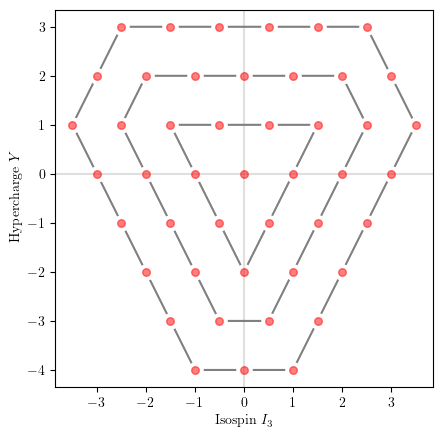

In [103]:
fig,ax = plt.subplots(figsize=(5,5))
draw_multiplet(ax, 5, 2,
               size=30,
               point_color='r', line_color='k', no_frame=False)